In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

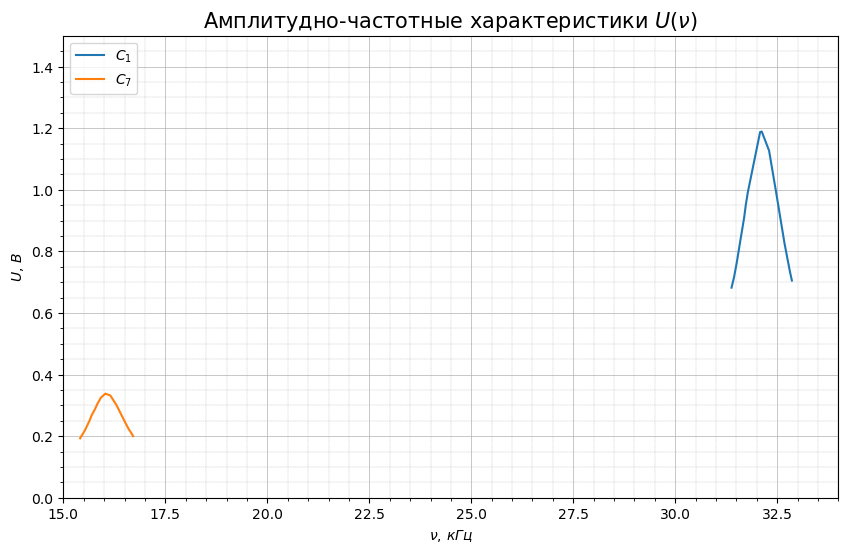

In [7]:
data = pd.read_excel('3.2.3.xlsx', sheet_name='АЧХ1')
names = list(data)
data = data.sort_values(by=names[0])

nu1 = data[names[0]]
u1 = data[names[2]]

data = pd.read_excel('3.2.3.xlsx', sheet_name='АЧХ7')
names = list(data)
data = data.sort_values(by=names[0])

nu7 = data[names[0]]
u7 = data[names[2]]

fig, ax = plt.subplots(figsize=(10, 6), dpi=100)

ax.plot(nu1, u1, label='$C_1$')
ax.plot(nu7, u7, label='$C_7$')

ax.legend(loc='upper left', fontsize=10)

ax.grid(which="major", linewidth=0.5)
ax.grid(which="minor", linestyle='--', linewidth=0.25)
plt.minorticks_on()

ax.axis([15, 34, 0, 1.5])

ax.set_title(r"Амплитудно-частотные характеристики $U(\nu)$", loc='center', fontsize=15)
ax.set_xlabel(r"$\nu,\, кГц$", loc='center', fontsize=10)
ax.set_ylabel(r"$U,\, В$", loc='center', fontsize=10)

plt.show()

fig.savefig("3.2.3_1.png", dpi=500)

In [10]:
data = pd.read_excel('3.2.3.xlsx', sheet_name='Резонансы')
names = list(data)
nu01 = data[names[1]][0]
nu07 = data[names[1]][6]
u01 = data[names[3]][0]
u07 = data[names[3]][6]

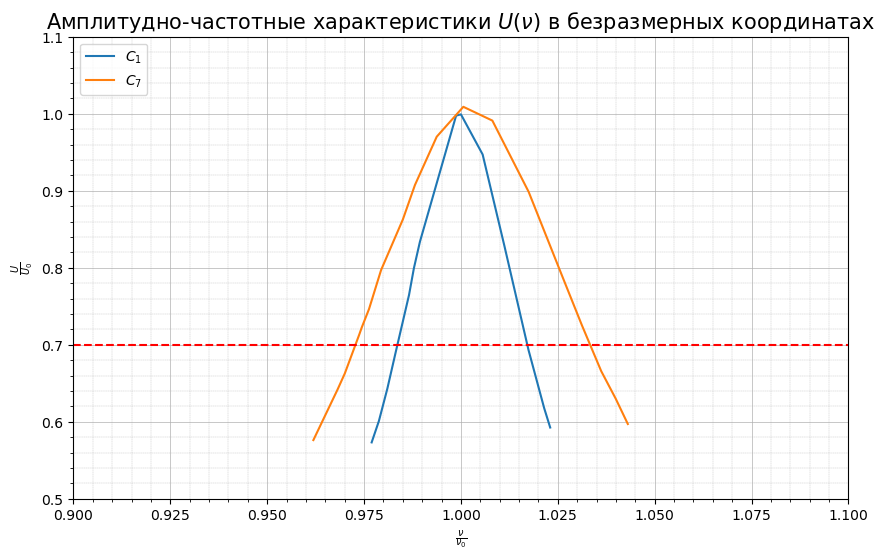

In [19]:
x1 = nu1/nu01
x7 = nu7/nu07
y1 = u1/u01
y7 = u7/u07

fig, ax = plt.subplots(figsize=(10, 6), dpi=100)

ax.plot(x1, y1, label='$C_1$')
ax.plot(x7, y7, label='$C_7$')
ax.hlines(y=0.7, xmin=0.9, xmax=1.1, color='r', linestyle='--')

ax.legend(loc='upper left', fontsize=10)

ax.grid(which="major", linewidth=0.5)
ax.grid(which="minor", linestyle='--', linewidth=0.25)
plt.minorticks_on()

ax.axis([0.9, 1.1, 0.5, 1.1])

ax.set_title(r"Амплитудно-частотные характеристики $U(\nu)$ в безразмерных координатах", loc='center', fontsize=15)
ax.set_xlabel(r"$\frac{\nu}{\nu_0}$", loc='center', fontsize=10)
ax.set_ylabel(r"$\frac{U}{U_0}$", loc='center', fontsize=10)

plt.show()

fig.savefig("3.2.3_2.png", dpi=500)

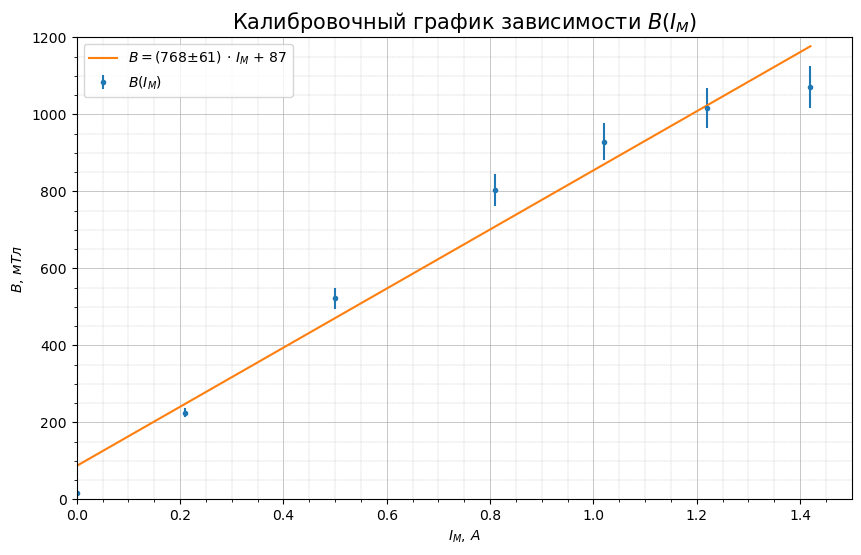

In [62]:
data = pd.read_excel('3.3.4.xlsx', sheet_name='Calibr')
names = list(data)

Im = data[names[0]]
B = data[names[2]]

k_cal, cov_cal = np.polyfit(Im, B, 1, cov=True)
B_p = np.polyval(k_cal, Im)

fig, ax = plt.subplots(figsize=(10, 6), dpi=100)

ax.errorbar(Im, B, yerr=[1.9, 12.2, 27.1, 41.1, 47.5, 51.8, 54.6], label =r"$B(I_М)$", fmt=".")
ax.plot(Im, B_p, label=r"$B = $" + r"({:.0f}$\pm${:.0f})".format(k_cal[0], np.sqrt(cov_cal[0][0])) + r"$\,\cdot\, I_М$" + r" + {:.0f}".format(k_cal[1]))

ax.legend(loc='upper left', fontsize=10)

ax.grid(which="major", linewidth=0.5)
ax.grid(which="minor", linestyle='--', linewidth=0.25)
plt.minorticks_on()

ax.axis([0, 1.5, 0, 1200])

ax.set_title(r"Калибровочный график зависимости $B(I_М)$", loc='center', fontsize=15)
ax.set_xlabel(r"$I_М,\, А$", loc='center', fontsize=10)
ax.set_ylabel(r"$B,\, мТл$", loc='center', fontsize=10)

plt.show()

fig.savefig("3.3.4_1.png", dpi=500)

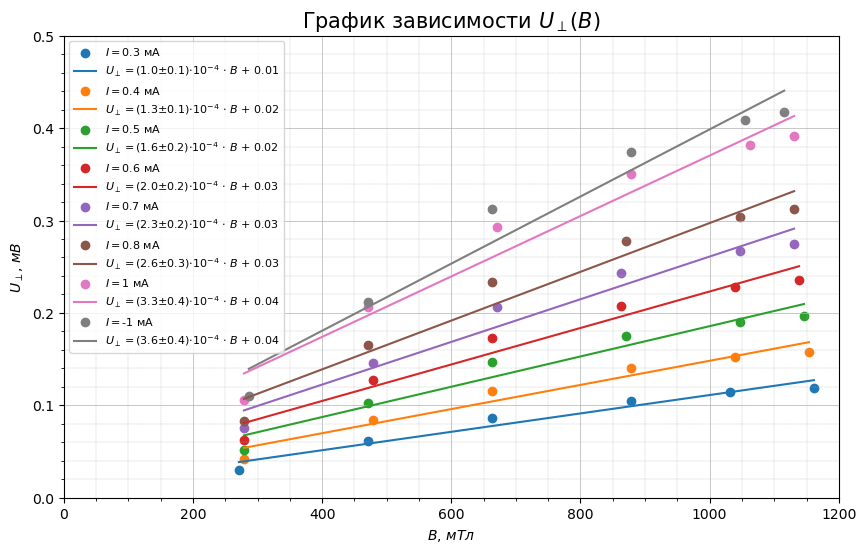

In [63]:
I_o = [0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 1, -1]

fig, ax = plt.subplots(figsize=(10, 6), dpi=100)

for i in I_o:
    data = pd.read_excel('3.3.4.xlsx', sheet_name='I_0='+str(i).replace('.', ',')+'мА')
    names = list(data)
    Im_tmp = data[names[0]]
    B_tmp = np.polyval(k_cal, Im_tmp)
    U_l = np.abs(data[names[3]])

    k, cov = np.polyfit(B_tmp, U_l, 1, cov=True)
    U_l_p = np.polyval(k, B_tmp)

    ax.scatter(B_tmp, U_l, label =r"$I = $"+str(i)+" мА", marker='o')
    ax.plot(B_tmp, U_l_p, label=r"$U_{\perp} = $" + r"({:.1f}$\pm${:.1f})".format(k[0]*10000, np.sqrt(cov[0][0])*10000) + r"$\cdot 10^{-4} \,\cdot\, B$" + r" + {:.2f}".format(k[1]))

ax.legend(loc='upper left', fontsize=8)

ax.grid(which="major", linewidth=0.5)
ax.grid(which="minor", linestyle='--', linewidth=0.25)
plt.minorticks_on()

ax.axis([0, 1200, 0, 0.5])

ax.set_title(r"График зависимости $U_{\perp}(B)$", loc='center', fontsize=15)
ax.set_xlabel(r"$B,\, мТл$", loc='center', fontsize=10)
ax.set_ylabel(r"$U_{\perp},\, мВ$", loc='center', fontsize=10)

plt.show()

fig.savefig("3.3.4_2.png", dpi=500)


In [64]:
def func(x, k):
    return k * x

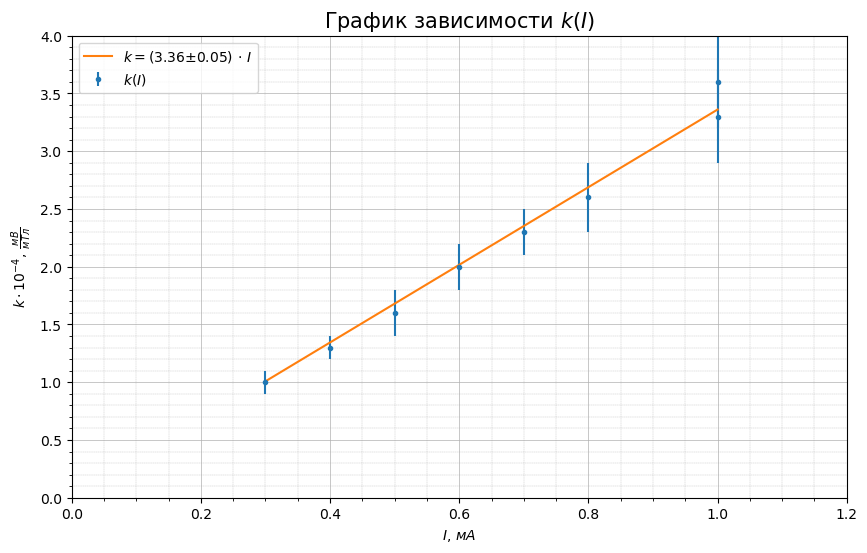

In [65]:
k_I = np.array([1.0, 1.3, 1.6, 2.0, 2.3, 2.6, 3.3, 3.6])  # * (10**(-4)) мВ/мТл
I_o = np.abs(I_o)

popt, pcov = curve_fit(func, I_o, k_I)

fig, ax = plt.subplots(figsize=(10, 6), dpi=100)

ax.errorbar(I_o, k_I, yerr=[0.1, 0.1, 0.2, 0.2, 0.2, 0.3, 0.4, 0.4], label =r"$k(I)$", fmt=".")
ax.plot(I_o, func(I_o, popt[0]), label=r"$k = $" + r"({:.2f}$\pm${:.2f})".format(popt[0], np.sqrt(pcov[0][0])) + r"$\,\cdot\, I$")

ax.legend(loc='upper left', fontsize=10)

ax.grid(which="major", linewidth=0.5)
ax.grid(which="minor", linestyle='--', linewidth=0.25)
plt.minorticks_on()

ax.axis([0, 1.2, 0, 4])

ax.set_title(r"График зависимости $k(I)$", loc='center', fontsize=15)
ax.set_xlabel(r"$I,\, мА$", loc='center', fontsize=10)
ax.set_ylabel(r"$k \cdot 10^{-4},\, \frac{мВ}{мТл}$", loc='center', fontsize=10)

plt.show()

fig.savefig("3.3.4_3.png", dpi=500)
